# Data Science Workshop

# 4. Seaborn for Data Visualization

**Seaborn** is a streamlined data visualization tool built on top of [**matplotlib**](https://matplotlib.org/) (a comprehensive Python library for plotting) and closely integrated with **pandas**, meaning that its *dataset-oriented* plotting functions operate on dataframes and arrays.

In [268]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="darkgrid", font_scale=1.3) # default style:
# There are five preset seaborn themes: `darkgrid` (default), `whitegrid`, `dark`, `white`, and `ticks`.

We will cover three major types of plots using seaborn:
1. Statistical relationships: `relplot()`
    - Scatter plots: `scatterplot()` or `kind = 'scatter'`
    - Line plots: `lineplot()` or `kind = 'line'`
    - Linear regression plots: `lmplot()` and `regplot()`
2. Categorical data: `catplot()`
    - Scatter plots: `stripplot()` and `swarmplot()`
    - Distribution plots: `boxplot()` and `violinplot()`
    - Estimate plots: `barplot()`, `pointplot()` and `countplot()`
3. Distributions
    - Univariate: `displot()`
    - Bivariate: `jointplot()`

We will frequently use the *tips* data provided by seaborn.

In [269]:
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [270]:
tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

## 4.1 Visualizing Statistical Relationships with `relplot()`

Relationship plot [`relplot()`](https://seaborn.pydata.org/generated/seaborn.relplot.html#seaborn.relplot) has two approaches: scatter plots and line plots. The key difference is the latter "connects" the scattered points.

### Scatter Plots

Scatter plots can be created by specifying `kind = 'scatter'` (default) in `relplot()`. Alternatively, simply call `scatterplot()`.

In [271]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


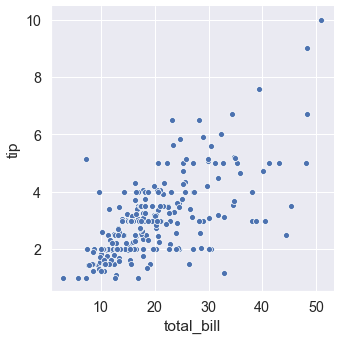

In [272]:
sns.relplot(x='total_bill', y='tip', data=tips)

There are three additional layers to change the exhibition of the points depending on other variables (columns) of the DataFrame:
- `hue` groups variable with varying colors
- `style` groups variable with different markers
- `size` groups variable with different point sizes

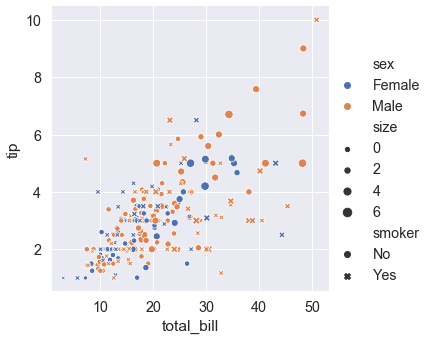

In [273]:
sns.relplot(x='total_bill', y='tip', data=tips, hue='sex', style='smoker', size='size')

We can further generate multiple plots (called "small-multiples") with other variables presented in rows and/or columns.

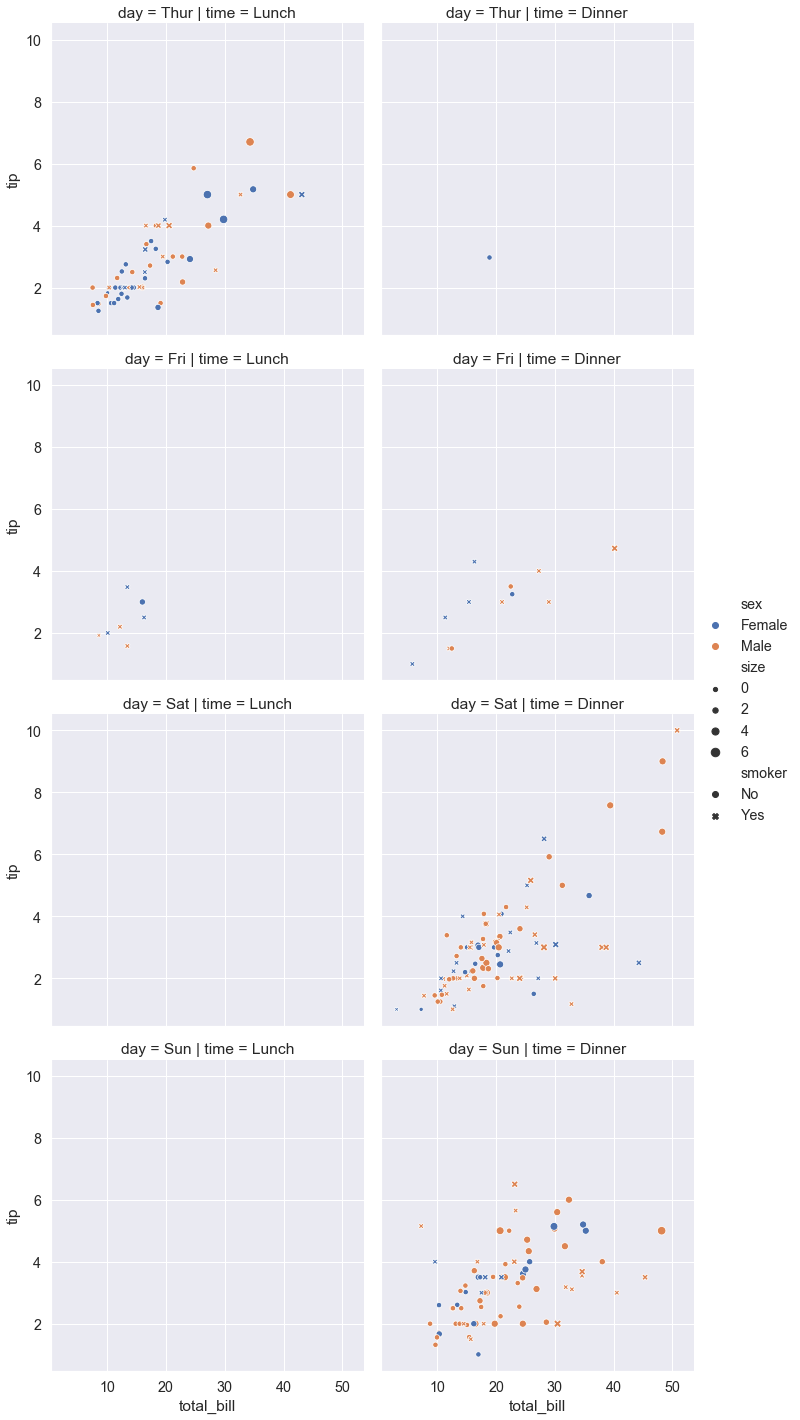

In [274]:
sns.relplot(x='total_bill', y='tip', data=tips, hue='sex', style='smoker', size='size', col='time', row='day')

### Line Plots

In cases where *changes* in one variable as function of *time* or *another variable* is of interest, line plots are a good choice. 

Line plots can be created by specifying `kind = 'line'` in `relplot()`. Alternatively, simply call `lineplot()`.

In [275]:
fifa_data = pd.read_csv('data/fifa.csv',index_col='Date',parse_dates=True)
fifa_data

,ARG,BRA,ESP,FRA,GER,ITA
Date,,,,,,
1993-08-08,5.0,8.0,13.0,12.0,1.0,2.0
1993-09-23,12.0,1.0,14.0,7.0,5.0,2.0
1993-10-22,9.0,1.0,7.0,14.0,4.0,3.0
1993-11-19,9.0,4.0,7.0,15.0,3.0,1.0
1993-12-23,8.0,3.0,5.0,15.0,1.0,2.0
...,...,...,...,...,...,...
2018-02-15,4.0,2.0,6.0,9.0,1.0,14.0
2018-03-15,4.0,2.0,6.0,9.0,1.0,14.0
2018-04-12,5.0,2.0,8.0,7.0,1.0,20.0


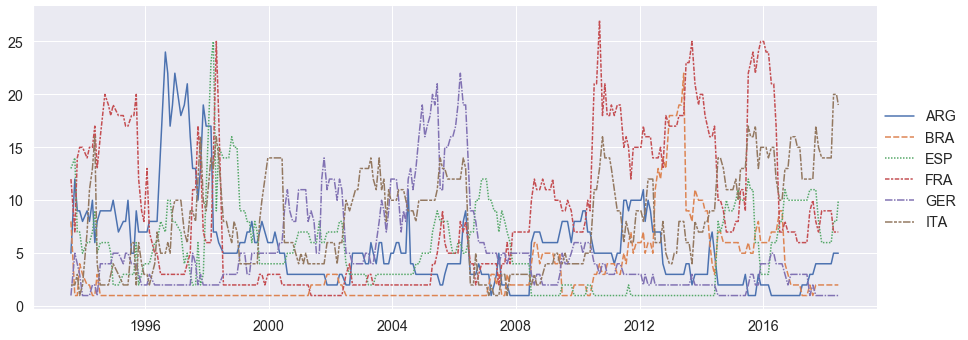

In [276]:
sns.relplot(data=fifa_data,kind='line', aspect=2.5)

In [277]:
fmri = sns.load_dataset('fmri') # functional magnetic resonance imaging data
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


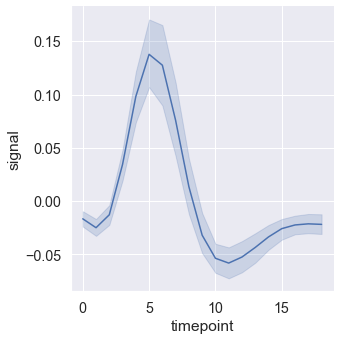

In [278]:
sns.relplot(x='timepoint', y='signal', kind='line', data=fmri)

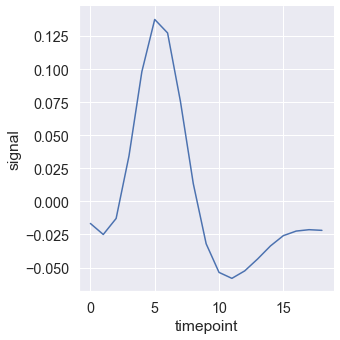

In [279]:
sns.relplot(x='timepoint', y='signal', kind='line', ci=None, data=fmri) # w/o 95% confidence interval

Similar to `scatterplot()`, `lineplot()` can also show up to three additional variables by modifying the `hue`, `style` and `size` of the plot elements.

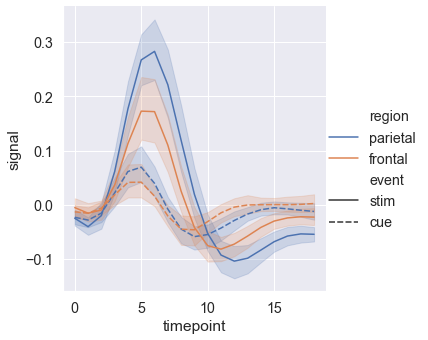

In [280]:
sns.relplot(x="timepoint", y="signal", hue="region", style='event', kind="line", data=fmri)

Small-multiples are of course also supported.

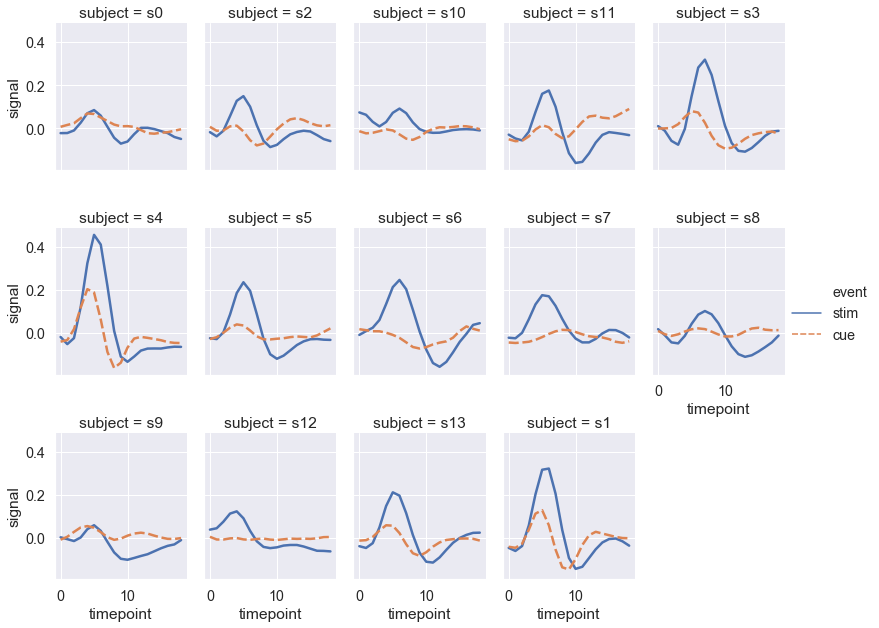

In [281]:
sns.relplot(x="timepoint", y="signal", hue="event", style="event",
            col="subject", col_wrap=5,
            height=3, aspect=.75, linewidth=2.5,
            kind="line", data=fmri.query("region == 'frontal'"))

### Linear Regression Plots

It is often useful to view (potential) linear relationship by superimposing a linear regression model over a scatterplot. This can be done by calling the `lmplot()` function.

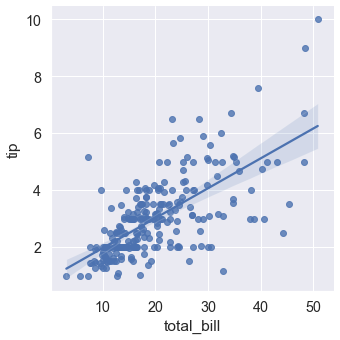

In [282]:
sns.lmplot(x="total_bill", y="tip", data=tips)

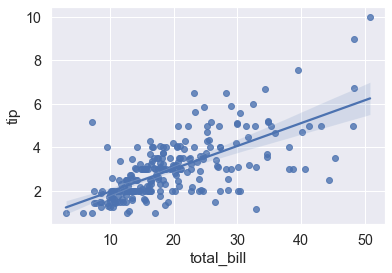

In [283]:
sns.regplot(x="total_bill", y="tip", data=tips)

Similar to `relplot()`, `lmplot()` also allows for additional *categorical* variables through `hue`, `col` and `row` arguments.

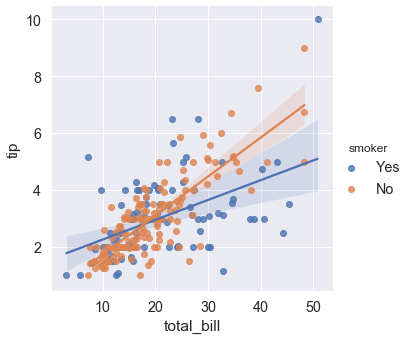

In [284]:
sns.lmplot(x='total_bill', y='tip', data=tips, hue='smoker')

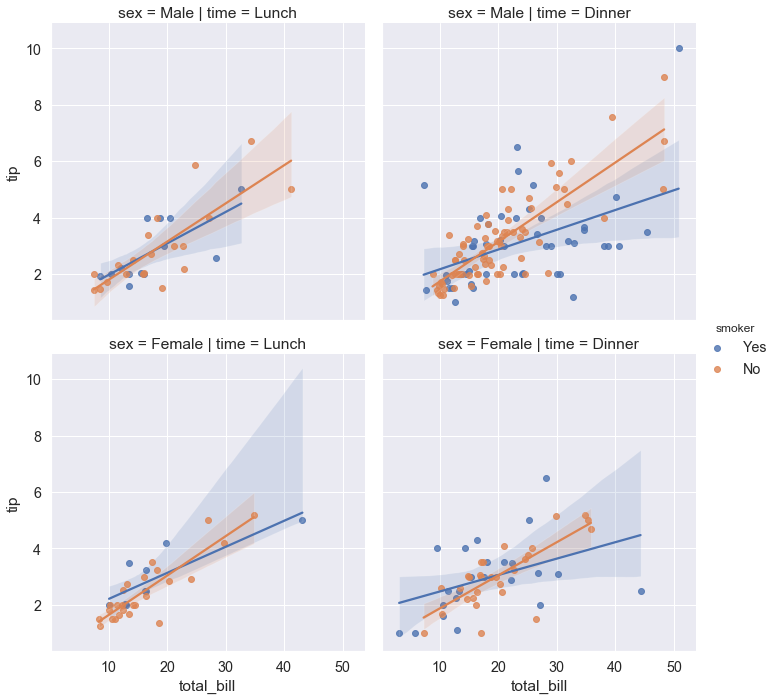

In [285]:
sns.lmplot(x='total_bill', y='tip', data=tips, hue='smoker', col='time', row='sex')

## 4.2 Visualizing Categorical Data with `catplot()`

In §4.1 we focus on *relational plots* where relationship between multiple variables in a dataset is exhibited but the *main relationship* (shown on x-y axes) is between two **numerical** variables. When one of the main variables is **categorical** (discrete, finite) rather than numerical (continuous, infinitly many), we may handle with various realizations of `catplot()`.

In [286]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Categorical Scatterplots

The default representation of `catplot()` is a scatterplot. In particular, there are two types of scatterplot: `stripplot()` and `swarmplot()`.

The first one, `stripplot()`, besides a direct call as is, can be called from `catplot()` with `kind='strip'` (or simply without this argument as it is the default).

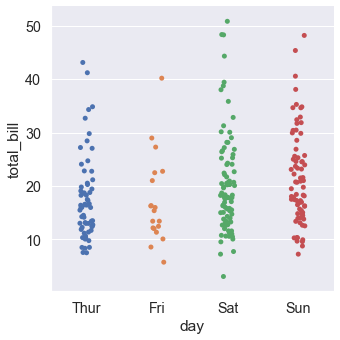

In [287]:
sns.catplot(x="day", y="total_bill", data=tips)

The second one, `swarmplot()`, besides a direct call as is, can be called from `catplot()` with `kind='swarm'`.

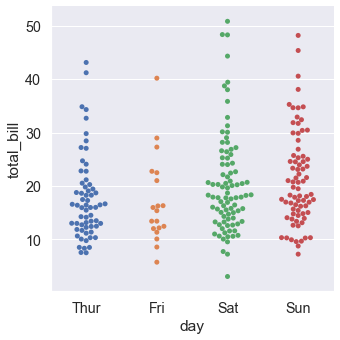

In [288]:
sns.catplot(x="day", y="total_bill", data=tips, kind='swarm')

Similar to relational plots, `catplot()` can also show another dimension of variable using `hue` (`style` and `size` are not supported), or generate "small-multiple" plots using `row` and `col`.

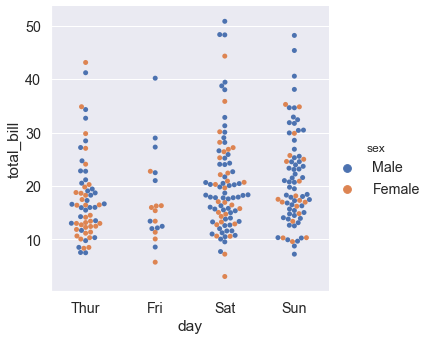

In [289]:
sns.catplot(x="day", y="total_bill", hue="sex", kind="swarm", data=tips)

Of course, the *categorical axis* does not have to be on the x-axis.

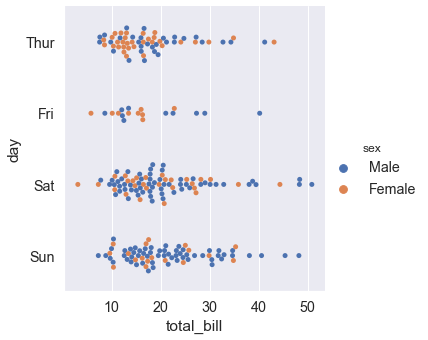

In [290]:
sns.catplot(y="day", x="total_bill", hue="sex", kind="swarm", data=tips)

Order of the *categorical axis* can be specified using `order=` argument.

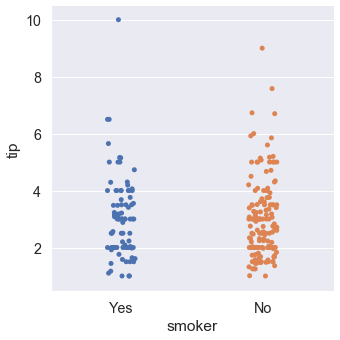

In [291]:
sns.catplot(x="smoker", y="tip", order=["Yes", "No"], data=tips)

### Categorical Distribution Plots

When the dataset is large, scatter plots may not be optimal as there are large amount of points. `boxplot()` and `violinplot()` may come handy.

`boxplot()` has three parts:
1. The **box** shows the three quartiles, Q1, Q2 (median) and Q3.
2. The **whiskers** extend to actual points that lie within 1.5 interquartile range (IQR, = Q3 - Q1).
3. The **outliers** that fall outside the range covered by the whiskers.

`boxplot()` can be called directly or from `catplot()` with `kind='box'`.

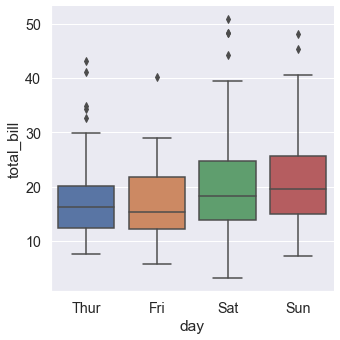

In [292]:
sns.catplot(x="day", y="total_bill", kind="box", data=tips)

Again, `hue` can be used to add one more variable.

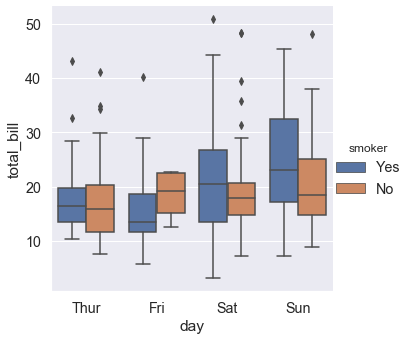

In [293]:
sns.catplot(x="day", y="total_bill", kind="box", data=tips, hue="smoker")

`violinplot()` is similar but provides a richer description of the value distribution. It can be either directly called or from `catplot()` with `kind='violin'`.

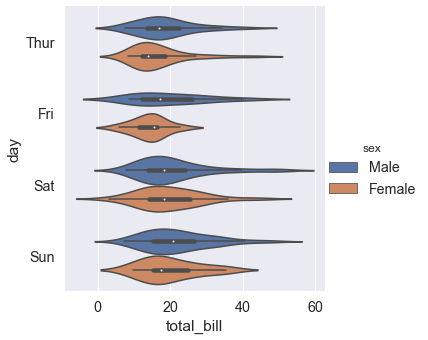

In [294]:
sns.catplot(x="total_bill", y="day", hue="sex", kind="violin", data=tips)

In the above case, since the `hue` variable (sex) has only two levels, we can add `split=True` to combine the two separate plots at each category.

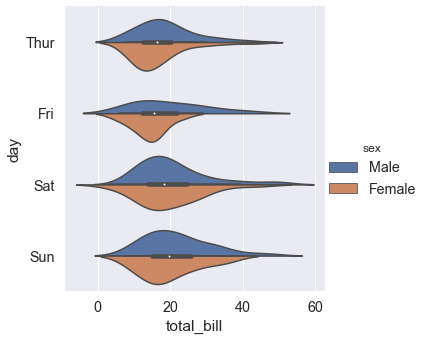

In [295]:
sns.catplot(x="total_bill", y="day", hue="sex", split=True, kind="violin", data=tips)

### Categorical Estimate Plots

A further abstraction from the strip/swarm and box/voilin plots is to just show an **estimate** of the "*central tendency*" of the values, e.g., the estimated mean and a confidence interval around the estimate. This can be done with `barplot()` and `pointplot()`.

`barplot()` can be called directly or from `catplot()` with `kind='bar'`.

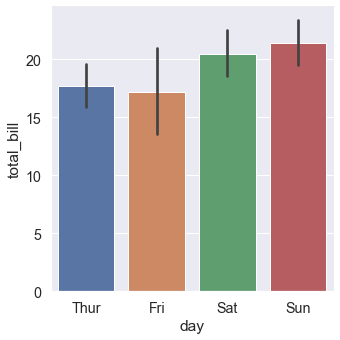

In [296]:
sns.catplot(x="day", y="total_bill", data=tips, kind='bar')

Of course, `hue` can be used to add another dimension.

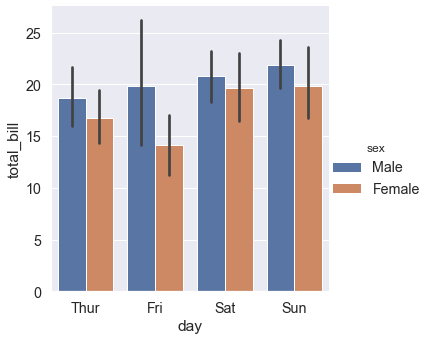

In [297]:
sns.catplot(x="day", y="total_bill", data=tips, kind='bar', hue='sex')

Instead of using mean, we can also use **median** as the estimate of central tendency.

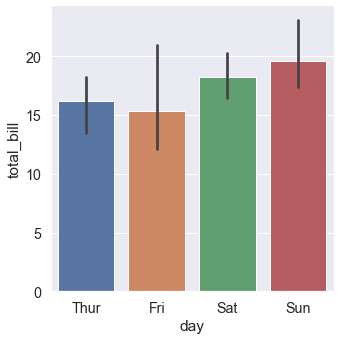

In [298]:
from numpy import median
sns.catplot(x="day", y="total_bill", data=tips, kind='bar', estimator=median)

An alternative style to `barplot()` is `pointplot()`, which shows only the point estimate and confidence interval without a full bar. Additionally, it connects points from the same `hue` category so that changes in the main relationship as a function of the hue semantic becomes evident.

`pointplot()` can also be called directly or from `catplot()` with `kind='point'`.

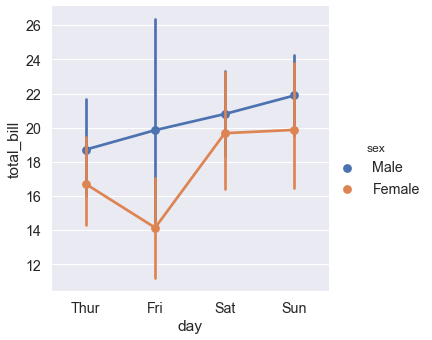

In [299]:
sns.catplot(x="day", y="total_bill", data=tips, kind='point', hue='sex')

Instead of plotting estimates of certain statistics (like mean and median) using `barplot()` and `pointplot()`, we can also simply plot the **number of occurrence** as a bar chart using `countplot()`, either through a direct call or from `catplot()` with `kind='count'`.

Note that in this case only `x` or `y` can appear.

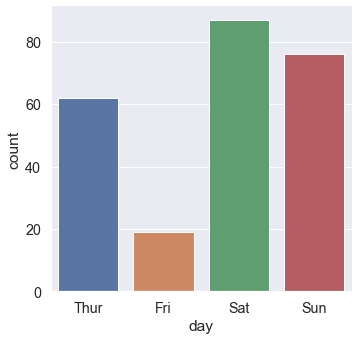

In [300]:
sns.catplot(x="day", data=tips, kind='count')

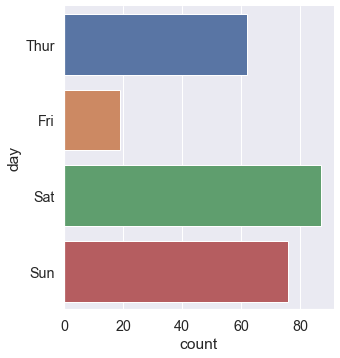

In [301]:
sns.catplot(y="day", data=tips, kind='count')

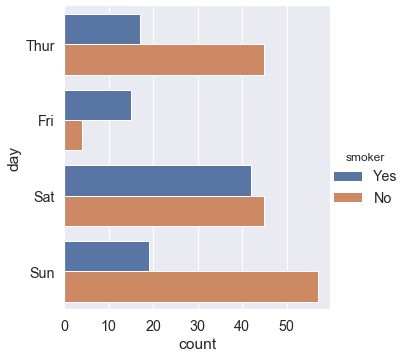

In [302]:
sns.catplot(y="day", data=tips, kind='count', hue='smoker')

In any of the above cases we can generate small multiples using `row` and/or `col`.

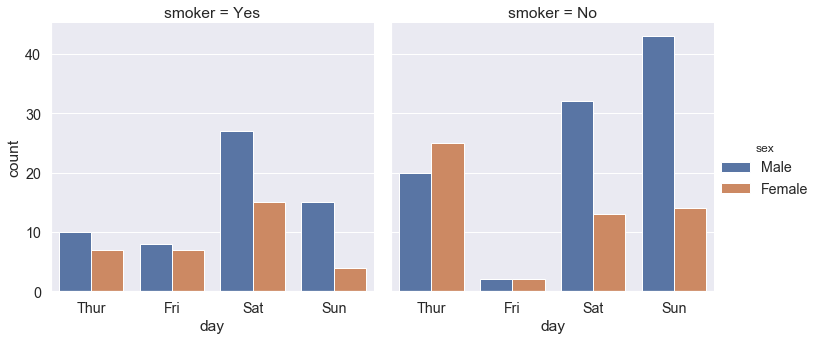

In [303]:
sns.catplot(x="day", data=tips, kind='count', hue='sex', col='smoker')

## 4.3 Visualizing Distributions

In §4.2 we focus on categorical plots which make it easy to compare the distribution of a variable across levels of other (categorical) variables. This section takes another view that concentrates on a specific variable or a specific pair of variables and displays the (joint) distribution.

### Univariate Distributions with `displot()`

We use `displot()` to draw a **histogram** and fit a **kernal density estimate (KDE)**.

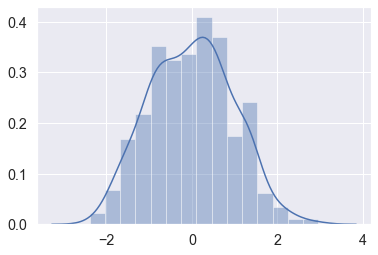

In [304]:
x = np.random.normal(size=500)
sns.displot(x, kde=True)

### Bivariate Distributions with `jointplot()`

`jointplot()` are useful in creating multi-panel figures that shows both the **joint distribution** of *two variables* along with the **marginal distribution** of each variable on separate axes.

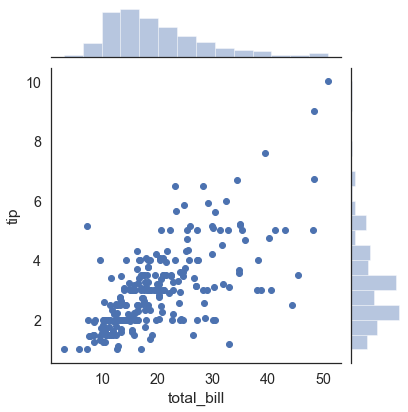

In [306]:
sns.set(style='white', font_scale=1.3)
sns.jointplot(x="total_bill", y="tip", data=tips)

The `kind` argument specifies different plots. By default `kind='scatter'` (as above). Otherwise:

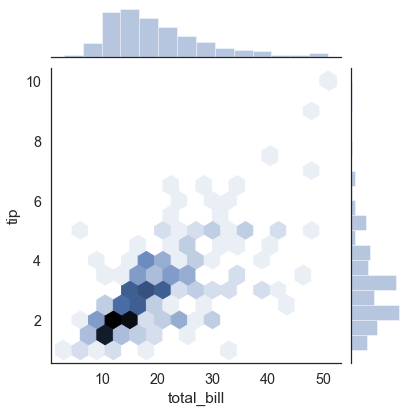

In [307]:
sns.jointplot(x="total_bill", y="tip", data=tips, kind='hex') # hexagonal bins

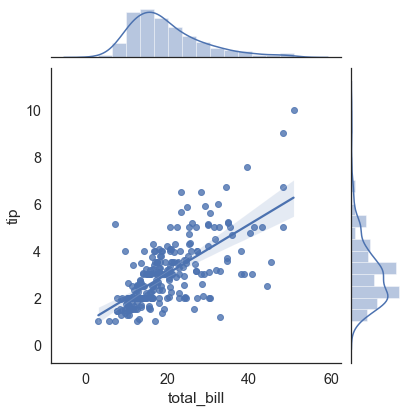

In [308]:
sns.jointplot(x="total_bill", y="tip", data=tips, kind="reg") # regression plot

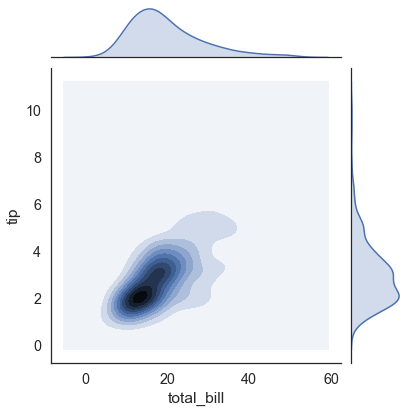

In [309]:
sns.jointplot(x="total_bill", y="tip", data=tips, kind="kde") # density plot

## 4.4 Multi-Plot Grids

Here we introduce a convenient and powerful function [`pairplot()`](https://seaborn.pydata.org/generated/seaborn.pairplot.html#seaborn.pairplot) that plot pairwise relationships in a dataset.

In [310]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


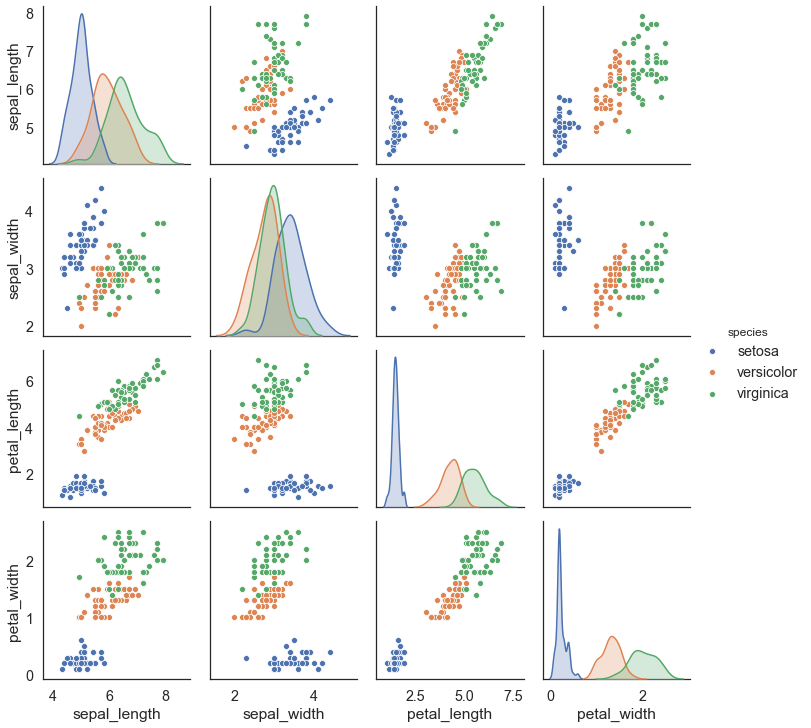

In [311]:
sns.pairplot(iris, hue='species')

## 4.5 Plot Aesthetics

There are rich controls over the plots' aesthetics, such as the overall figure style, axes style, and color palettes. Please refer to the seaborn tutorial on [controlling figure aesthetics](https://seaborn.pydata.org/tutorial/aesthetics.html) and [choosing color palettes](https://seaborn.pydata.org/tutorial/color_palettes.html).

# 5. Open Project

## Olympic Games

This is a historical dataset on the modern Olympic Games, including all the Games, Winter and Summer, from Athens 1896 to Rio 2016. Now due to COVID19, we are experiencing the first postponed Game, Tokyo 2020 to be held in 2021.

**Note**: the Winter and Summer Games were held in the same year up until 1992. After that, they staggered them such that Winter Games occur on a four year cycle starting with 1994, then Summer in 1996, then Winter in 1998, and so on.

The file olympics.zip contains 271,116 rows and 15 columns. Each row corresponds to an individual athlete competing in an individual Olympic event (athlete-events). The columns are:

1. **ID** - Unique number for each athlete
1. **Name** - Athlete's name
1. **Sex** - M or F
1. **Age** - Integer
1. **Height** - In centimeters
1. **Weight** - In kilograms
1. **Team** - Team name
1. **NOC** - National Olympic Committee 3-letter code
1. **Games** - Year and season
1. **Year** - Integer
1. **Season** - Summer or Winter
1. **City** - Host city
1. **Sport** - Sport
1. **Event** - Event
1. **Medal** - Gold, Silver, Bronze, or NA

Use your imagination and the skills learned today, try to explore this dataset and extract as much information/intuition as you can.

Sources:

- Kaggle (https://www.kaggle.com/)
- NumPy tutorial (https://numpy.org/devdocs/user/quickstart.html)
- Pandas tutorial (https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html)
- Seaborn (https://seaborn.pydata.org/)